# Regression

In this section, we will implement models that aim to predict the melanoma tumor size of a patient based on other attributes.

We will be doing a multiple linear regression.  
Our features / Independent variables (X1, X2, etc..) will be the columns of the dataset, other than tumor size which is Y.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("seaborn-darkgrid")

In [2]:
data = pd.read_csv(r"../input/melanoma-tumor-size-prediction-machinehack/Train.csv") #insert file path into the "read_csv" function
data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
list(data.columns)

['mass_npea',
 'size_npear',
 'malign_ratio',
 'damage_size',
 'exposed_area',
 'std_dev_malign',
 'err_malign',
 'malign_penalty',
 'damage_ratio',
 'tumor_size']

All of these variables shown up (other than tumor_size) are the features that we will use for prediction.  
tumor_size is the variable we will try predicting.

Checking Missing Values:

In [4]:
data.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

(Number of patients, number of variables):

In [5]:
data.shape

(9146, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


X: variables/features that we will use to make predictions  
Y: The variable that will try to predict correctly

In [7]:
x = data.drop("tumor_size", axis=1)
y = data["tumor_size"]

In [8]:
x.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200


In [9]:
y.head()

0    14.103
1     2.648
2     1.688
3     3.796
4    18.023
Name: tumor_size, dtype: float64

We have to split our data into train and test sets.  
This means that we will not show all patients/examples to our model.  
We will let the model learn from a certain number of patients/examples, then we will test on the ones it didn't see.  
This is to check if the model makes good predictions for patients that it hasn't seen before.  
We need to give the model many examples to learn from, because the more examples you give it, the better it learns.  
So we show it most of our data (usually, about 70% to 90%) and keep a small number of examples/patients for testing.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=11)

## Linear Regression

![](http://miro.medium.com/max/1838/1*uLHXR8LKGDucpwUYHx3VaQ.png)

![](https://www.researchgate.net/profile/Hieu-Tran-17/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm)

![](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

If we represent our model the following way: Y = b1.X1 + b2.X2 + ... + bn.Xn + C,  
then the fit function allows the model to be find the best coefficient bi for each variable Xi, and the best constant term C.  
In other words, it gives them values that produce an error that is as small as possible.

In [13]:
model.fit(xtrain, ytrain)

LinearRegression()

Now, we need to test our model.  
We will evaluate the predictions it makes for the patients it hasn't seen before.  

The predict function tells the model to make predictions.

In [14]:
ypred = model.predict(xtest)

Now we need to compare the values that the model predicted with the real values (which the model doesn't know).  
To do this, we can calculate the "mean absolute error" between the real values and the predicted values.  
The Mean Absolute Error simply means "On average, how much error does the model make when predicting the tumor size of the patient?"

In [15]:
from sklearn.metrics import mean_absolute_error

> random_state

In [16]:
mean_absolute_error(ytest, ypred)

4.112451737316707

The MAE value is 3.99 or basically 4.  
Is that a small error or a big one?

Let's take a look at the real values of tumor sizes:

In [17]:
ytest

3344    10.045
4259     3.648
8820    13.637
204      1.598
6172     4.202
         ...  
4159     1.537
2366     6.711
8178     2.305
4048    14.927
2387    19.912
Name: tumor_size, Length: 915, dtype: float64

If we take patient number 6700, we can see that the size of the tumor is 0.88  
Our model makes an average error of 4.2, so it will make a prediction around 0.88 + 4.2 = 5.08.  
5.08 is different from 4.2, and thus our model is making a BIG error for this patient.  
If you do look at the other patients you can see that an error of 4.2 will cause predictions to be really bad and far from the truth.  
##### What does this mean?  
It means that a linear regression model can not make good predictions on this dataset.  
We can also say that the equation Y = b1.X1 + b2.X2 + ... + bn.Xn + C is not a good approximation of reality in this case.  
##### What do we do now?  
Well, we'll be trying another model: the regression tree

## Regression Tree

A decision tree predicts by asking certain questions then making judgements based on the answer.  
Training (fitting) consists of learning what are the questions that should be asked, and what judgement to make in each possible answer.  
The picture below illustrates this. It shows that the tree consists of nodes, each node being a question. Based on the answer, an appropriate y-value is decided. It also shows the number of samples/rows that correspond to that answer.

![](https://www.statology.org/wp-content/uploads/2020/11/tree3.png)

*But how does the tree learn which questions to ask?*  
Well, questions separate points, which represent clients in our case.  
Points that represent the "yes" answer will be in a group, while ones that correspond to the "no" answer will be in a different group.  
If points in a same group have very different y values then this question isn't useful to ask.  
However if the question separates points into groups such that points in the same group have very similar y values then the question is good to ask.  
**But how does the tree find the good questions?**  
It (kind of) asks many possible questions then picks the best ones.  
**But what kind of questions can be asked?**  
The questions are usually inequalities related the values of features (the columns)  
For example, one question could be "x1 > 1.2 ?" and another could be "x5 < 70 ?".  
Each question corresponds to a split in the feature space (which basically represents the x values).  
For example if we ask "x2 < 23.1 ?" then some points will be on the side of the space where x2 < 23.1 and others will be on the side where x2 >= 23.1.  
The following picture illustrates that.

![](https://media.springernature.com/original/springer-static/image/prt%3A978-1-4899-7687-1%2F18/MediaObjects/978-1-4899-7687-1_18_Part_Fig1-717_HTML.gif)

A regression tree basically groups points according to their y value.  
In other words, points that have similar y values (such as 1.2, 1.4 and 1.1) would be in the same group.  
When predicting the y value of a sample/point/observation/example/row, the tree puts it in a group of points that have similar x values, then assigns to it the mean y value of that group.  

**But how does the tree measure the "goodness" of a question/split?**  
Well, the question divides points into two groups.  
The tree algorithm calculates the average error in each group.  
Meaning it calculates the error that corresponds to every point then calculates the average.  
The error is the distance between the y value of that point and the average y value of the group.  
Sometimes we the square of that distance as the error, sometimes not. But both are valid.  
After calculating the average error for each group, the average error of the question is calculated which is the average between the two groups.  
This is done by multiplying each group error by the number of points in that group, adding and dividing by the total number of points.  
The following image shows examples of errors that we can use. The mean absolute error is the average distance between points and their average.

![](https://1.bp.blogspot.com/-kL42RjXdOEc/XMELxXVMe3I/AAAAAAAABRw/mx2RoIheodwWj0CPAqg9chwXJmpOyPyJQCLcBGAs/s1600/Loss_Functions.PNG)

I'm sure that explaining this in paragraphs isn't the most useful thing, but I just couldn't make a tutorial with nothing but code in it.  
There are plenty of video courses/tutorials/explanations that explain the details of decision trees really well so make sure you check them out.

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regression_tree = DecisionTreeRegressor()

In [20]:
regression_tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [21]:
ypred_train = regression_tree.predict(xtrain)
mean_absolute_error(ytrain, ypred_train)

0.001459482444417446

In [22]:
ypred_test = regression_tree.predict(xtest)
mean_absolute_error(ytest, ypred_test)

3.329028415300546

#### Notes:
* The tree achieved better results than Linear Regression. This almost always the case.  
* The tree has practically zero error on the training set. This is because it kept splitting until almost every point is in a group by itself.
* The gap between training and testing scores is larger for the tree than it is for linear regression.
* This is because the tree focused too much on the training data that it basically memorized it. Thus, when we tested it with data that it hasn't seen/memorized it failed to produce good results.
* This is like memorizing 10 math exercices and hoping you get something similar in the test vs understanding exercices.

We can improve the testing performance by telling the tree not to grow too long/deep.  
Growing too long/deep means the tree is making more cuts in the feature space (the space defined by the features x1, x2, etc..). By making more cuts the tree adjusts better to the data that it's training on.  
We don't want the tree to adjust too well to the training data because then it wouldn't perform that well on data that isn't perfectly similar (the testing data).  
The "max_depth" parameter sets the maximum number of successive nodes / the maximum branch length / the maximum number of questions to be asked.

In [23]:
another_regression_tree = DecisionTreeRegressor(max_depth=15)

In [24]:
another_regression_tree.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=15)

In [25]:
ypred_train = another_regression_tree.predict(xtrain)
mean_absolute_error(ytrain, ypred_train)

0.8565271345088096

In [26]:
ypred_test = another_regression_tree.predict(xtest)
mean_absolute_error(ytest, ypred_test)

3.2295696646823373

We can see that the training error increased because the tree isn't perfectly fit to the training data now, but the testing results are better.

# Classification

In this section we will build models that aim to predict whether a client is satisfied or neutral/dissatisfied.  
The following is preprocessing and exploratory analysis. It isn't very commented since it isn't the focus point of this tutorial.

In [27]:
train=pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test=pd.read_csv("../input/airline-passenger-satisfaction/test.csv")

In [28]:
list(train.columns)

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [29]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [30]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [31]:
train.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
test.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [32]:
train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [33]:
test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [34]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [36]:
categoricals = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [37]:
for col in categoricals:
    print(train[col].value_counts())
    print("\n")

Female    52576
Male      51018
Name: Gender, dtype: int64


Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64


Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64


Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64


neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64




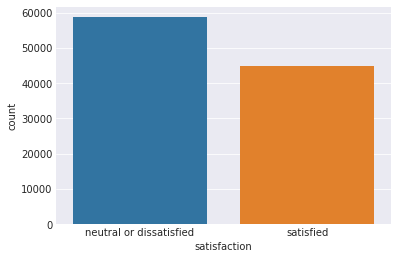

In [38]:
sns.countplot(x=train["satisfaction"])
plt.show()

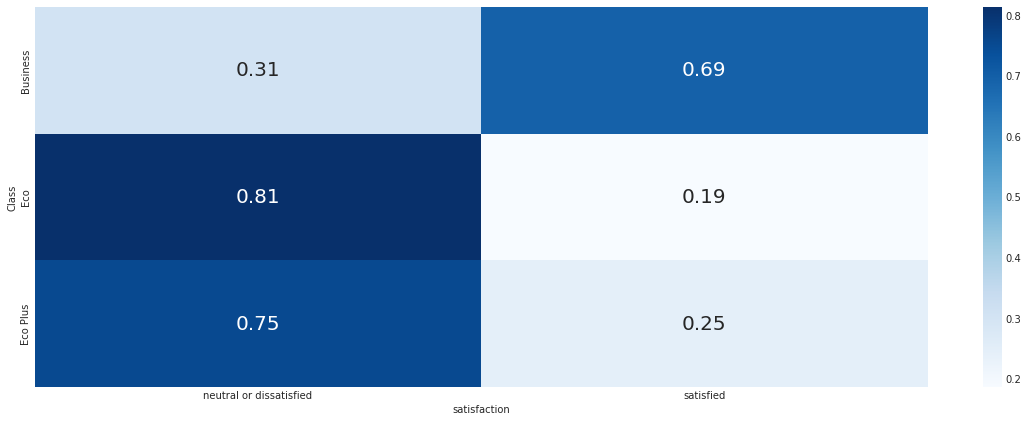

In [39]:
plt.figure(figsize=(20,7))
sns.heatmap(pd.crosstab(train["Class"], train["satisfaction"], normalize="index"),
            annot = True, cmap="Blues", fmt=".2f", annot_kws={"fontsize":20})
plt.show()

I've decided to encode "Class" labels/values based on their relationship with satisfaction:

In [40]:
train["Class"] = train["Class"].map({"Eco":0, "Eco Plus":1, "Business":2})
test["Class"] = test["Class"].map({"Eco":0, "Eco Plus":1, "Business":2})

In [41]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [42]:
train.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,13,1,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,1,0,1,0
1,25,2,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,1,1,0,0
2,26,2,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,0,0,0,1
3,25,2,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,0,0,1


In [43]:
target = "satisfaction_satisfied"
xtrain, ytrain = train.drop(target, axis=1), train[target]
xtest, ytest = test.drop(target, axis=1), test[target]

In [44]:
xtrain.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,3,4,4,5,5,25,18.0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,5,3,1,4,1,1,6.0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,3,4,4,4,5,0,0.0,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,5,3,1,4,2,11,9.0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,4,3,3,3,0,0.0,1,0,0


In [45]:
ytrain.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction_satisfied, dtype: uint8

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

xtrain_array = ss.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_array, columns=xtrain.columns)

xtest_array = ss.transform(xtest)
xtest = pd.DataFrame(xtest_array, columns=xtrain.columns)

In [47]:
xtrain.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,-1.745542,-0.029475,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,...,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,1.015154,-0.472883,1.491414
1,-0.951526,1.009095,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,...,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,1.015154,2.114687,-0.670505
2,-0.885358,1.009095,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,...,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,-0.985072,-0.472883,-0.670505
3,-0.951526,1.009095,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,...,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,-0.985072,-0.472883,-0.670505
4,1.430521,1.009095,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,...,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1.015154,-0.472883,-0.670505


## Logistic Regression

Logistic Regression is not a regression model but rather a classification model.  
It constructs an S-shaped curve (in case of one variable x) that represents the probability of y=1.

![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)

The logistic curve corresponds to the logistic function, which corresponds to the formula in the following image.

![](https://www.saedsayad.com/images/LogReg_1.png)

The x value that corresponds to y=0.5 is called the "decision boundary".  
It separates points based on their x value into two groups.  
One group corresponds to Y=1 and the other corresponds to y=0.

![](https://media-exp1.licdn.com/dms/image/C4E22AQEUYF4-CUIZkw/feedshare-shrink_800/0/1636572090596?e=1639612800&v=beta&t=V0JxLlmQL5ej6acmoJ1y3Yx9bwXLjXMoY17wvgaBAxE)

In case of 2 variables, the S-shaped curve becomes an S-shaped surface (but kind of flat..) which we can't draw here since that would require 3 dimensions.  
The decision boundary becomes a straight line though which we can draw.  
This line tries to separate points into 2 classes.

![](https://www.researchgate.net/publication/335786324/figure/fig1/AS:802479209971712@1568337361258/Logistic-regression-and-linear-regression.jpg)

Of course, sometimes you can't separate the two classes (y=1 and y=0) perfectly with a straight line.  
The following image on the right is more realistic than the one on the left.

![](https://camo.githubusercontent.com/fa25e1f53a14c7839d4659edf09c1e9b7a8fcad93727a5eea63b2b4b65454164/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313831382f302a61585578764e7556695f2d716335566b2e706e67)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
logreg = LogisticRegression(solver='liblinear')

In [50]:
logreg.fit(xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [51]:
y_predicted_testing = logreg.predict(xtest)
accuracy_score(ytest, y_predicted_testing)

0.8714324334762291

In [52]:
y_predicted_training = logreg.predict(xtrain)
accuracy_score(ytrain, y_predicted_training)

0.8747900457555456

# Classification Tree

The same as a regression tree but predicts classes instead of numerical values.

![](https://miro.medium.com/max/569/0*Yclq0kqMAwCQcIV_.jpg)

![](https://raw.githubusercontent.com/valoxe/image-storage-1/master/blog-machine-learning/decision-tree-random-forest/2.png)

The classification tree is more flexible than logistic regression.  
This is because in reality the data points (in this case clients) aren't always distributed in such a way that you can separate them with a straight line.  
The following image is an example where a tree is more suitable than logistic regression.

![](https://miro.medium.com/max/1248/1*Ixw2RgVQ4syGyCD6ArLcZw.png)

The learning algorithm of the classification tree (which is learning what questions to ask / what splits to make) is almost the same as the regression tree algorithm.  
Instead of evaluating a split/question by comparing y values of different groups (which is basically what the regression tree does), a split/question is evaluated by how much it sets the 2 classes apart.

![](https://i.stack.imgur.com/FgdfC.jpg)

![](https://www.researchgate.net/publication/313816842/figure/fig2/AS:962701719257088@1606537384464/A-decision-tree-with-its-decision-boundary-Each-node-of-the-decision-tree-represents-a.gif)

To evaluate how good a split/question is, we calculate the 'Gini Impurity' that corresponds to it.  
The Gini Impurity is calculated using the following formula:

![](https://static.wixstatic.com/media/02b811_5df05513ffd4487d843bb401dfa5e0cb~mv2.png/v1/fit/w_309%2Ch_118%2Cal_c/file.png)

Understand why that formula is good for evaluating splits/questions is out of the scope of this tutorial since it isn't dedicated to understanding the mathematical details of algorithms but rather the main concepts.  
However, there are plenty of resources on the internet that explain these details really well.

The following is an example of a tree that classifies samples / data points that belong to three classes instead of 2 ie [0, 1, 2] instead of [0, 1]

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52003/versions/3/screenshot.jpg)

Example of a tree that is too short and doesn't separate classes very well (can be improved by allowing the tree to be longer/deeper) and a tree that is much deeper.

![](https://www.learnbymarketing.com/wp-content/uploads/2016/03/linear-sep-decision-tree.png)

In [53]:
from sklearn.tree import DecisionTreeClassifier
mytree = DecisionTreeClassifier()

In [54]:
mytree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [55]:
y_predicted_training = mytree.predict(xtrain)
accuracy_score(ytrain, y_predicted_training)

1.0

In [56]:
y_predicted_testing = mytree.predict(xtest)
accuracy_score(ytest, y_predicted_testing)

0.9467037423241803

As always the tree is very adjusted to the training data but less to the testing data.  
However it still gave better results than logistic regression.  
If we tell the tree not to grow too long, then it should get better testing results.

In [57]:
my_other_tree = DecisionTreeClassifier(max_depth=19)

In [58]:
my_other_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=19)

In [59]:
y_predicted_training = my_other_tree.predict(xtrain)
accuracy_score(ytrain, y_predicted_training)

0.9866111936984767

In [60]:
y_predicted_testing = my_other_tree.predict(xtest)
accuracy_score(ytest, y_predicted_testing)

0.9528057776232959

### الحمد لله الذي بنعمته تتم الصالحات